# Regression

회귀는 아래의 순서대로 학습한다. 
1. Univariate Linear Regression
2. Gradient Descent 
3. Multivariate Linear Regression
4. Polynomial Regression

## Univariate Linear Regression

회귀분석에서 주 목적은 변수들의 관계를 찾는데 있다. 일변량 선형 회귀분석은 하나의 독립변수(입력값)와 종속변수(출력값)의 관계를 찾는데 집중한다. 

다음과 같은 데이터 값들 $(x_i, y_i),~   i \in \{1..N\}$이 있다고 하자. (여기서 $x_i$ 가 독립변수, $y_i$ 가 종속변수이다.) 이와 같은 데이터 값들이 있을 때, 두 값들의 관계를 찾는 가장 간단한 모델은 두 변수가 선형의 관계가 있다고 가정하는 모델이다. 간단한 선형회귀 모델은 다음과 같다: 

$y_i = m x_i + n + \epsilon_i $

여기서 m은 지난 시간 introduction 에서 배운 기울기, n은 y절편, $\epsilon$ 은 오차 (또는 노이즈)이며, $m$과 $n$은 상수이다. 

그렇다면, 상수 $m$과 $n$은 어떻게 구할 수 있을까?  (의미 있는 것을 구해야 겠지요? ) 다음의 순서대로 따라서 공부해보자. 

- 의미있는 상수는 오차를 최소화하는 값이라고 할 수 있다. 
- 오차란 예측된 값($\hat{y}_i= m x_i + n$) 과 실측값($y_i$)의 차이라고 하자. 
- 계산 편의상 오차의 제곱의 합을 최소화 하는데 초점을 맞추자. (읽을 거리: root-mean square, Gaussian noise)

이제 아래의 수식을 최소화 해보자. 

\begin{align}
E(m,n) &= \sum \epsilon_i^2\\
        & = \sum (y_i - \hat{y}_i )^2 \\
       & = \sum (y_i - m x_i - n )^2
\end{align}

최소자승법(OLS)에 따라 위 수식을 최소화 하는 $m$과 $n$값은 $m$과 $n$에 대해 미분하여 그 값이 0이 되는 값임을 알고 있다. 위 함수를 각각 $m$과 $n$에 대해 편미분해보자.  

\begin{align}
\partial E(m,n) \over \partial m &= -2   \sum (y_i - m x_i - n )x_i\\
\partial E(m,n) \over \partial m & = -2  \sum (y_i - m x_i - n ) \\
\end{align}

위 두 식이 0이 되게 만드는 $m$과 $n$을 찾으면 된다. (참 간단하다...) 

먼저 n에 대하여 방정식을 풀면, 
- $n = \sum(y_i - m x_i) / N$ 또는 $\bar{y} - m\bar{x}$
- $m = {\sum (y_i - \bar{y} )(x_i - \bar{x}) \over \sum (x_i - \bar{x} )(x_i - \bar{x})} $ 또는 $Cov(x,y)\over Var(x)$


### 실습

자 그렇다면, 이제 지난 주에 배웠던 내용을 되살려보자. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("SalaryData.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [4]:
lin_reg = LinearRegression()

lin_reg.fit(np.array(df["YearsExperience"]).reshape(-1,1), np.array(df["Salary"]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

여기서 잠깐, reshape이 뭔가? 

In [5]:
np.array(df["YearsExperience"]).reshape(-1,1)

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9449.96232146]
Intercept:  25792.20019866871


자 그렇다면, 오늘 배운 내용을 바탕으로 직접 구해보자.

아래의 힌트를 사용하자. (시간을 절약하기위해...)

In [7]:
df['YearsExperience'].var()

8.053609195402299

In [8]:
df.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


## Gradient Descent

선형회귀에서 OLS가 불가능하거나, OLS의 연산의 실행속도가 느리다면, 다른 방법으로 독립변수와 종속변수의 관계를 찾아야 한다.

이때, 사용하는 것이 Gradient Descent 이며, Gradient Descent 의 알고리즘은 다음과 같다.

### Gradient Descent Updates

repeat until convergence: 
    $\theta_j := \theta_j - \alpha {\partial \over \partial \theta_j}  J(\theta_0, \theta_1)  $


여기서 J는 지난주 수식의 E(m,n)으로 생각하고, $\theta_1$ 와 $\theta_0$을 각각 $m$,$n$이라고 가정하자. 

또한 $\alpha$는 learning rate라고도 하며, 얼마나 모델을 빨리 학습하는지를 좌우 한다. 

이제 GD를 이용하여, 의미있는 m과 n을 구해보도록 하자. 

먼저 cost function J(또는 E)를 정의하자.

In [9]:
def compute_cost(n,m, points):
    total_cost = 0
    N = float(len(points))      # 왜 float로 casting 했는지 ? 
    
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        total_cost += (y-(m*x+n))**2
        
    return total_cost/N    # 때에 따라 N은 없어도 됨.

다음으로 Gradient Descent 함수를 정의하자. 

In [117]:
def gradient_descent_runner(points, starting_m, starting_n, learning_rate, num_iterations):
    
    m = starting_m
    n = starting_n
    
    cost_graph = []
    
    for i in range(num_iterations):
        cost_graph.append(compute_cost(n,m,points))
        m,n = step_gradient(m,n, points, learning_rate)
        
    return [m,n,cost_graph]


def step_gradient(m_current, n_current, points, learning_rate):
    m_gradient = 0 
    n_gradient = 0 
    N = float(len(points))
    
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        m_gradient += -(2/N)*x*(y-(m_current*x + n_current))
        n_gradient += -(2/N)*(y-(m_current*x + n_current))
        
        m_updated = m_current - learning_rate * m_gradient 
        n_updated = n_current - learning_rate * n_gradient 
        
        return m_updated, n_updated
        

In [169]:
learning_rate = 0.00001
initial_n = 10000
initial_m = 10000
num_iterations = 100000

points = np.array(df)
m, n , cost_graph = gradient_descent_runner(points, initial_m, initial_n, learning_rate, num_iterations)




In [150]:
n

17798.380090497732

In [151]:
m

19586.0180995475

In [104]:
cost_graph

[6501848514.9766655,
 6492393033.137843,
 6482948693.096768,
 6473515483.775301,
 6464093394.105637,
 6454682413.03029,
 6445282529.502096,
 6435893732.484202,
 6426516010.950041,
 6417149353.883344,
 6407793750.278115,
 6398449189.138632,
 6389115659.479429,
 6379793150.325296,
 6370481650.711257,
 6361181149.682576,
 6351891636.294739,
 6342613099.613443,
 6333345528.714587,
 6324088912.68427,
 6314843240.61878,
 6305608501.624573,
 6296384684.8182745,
 6287171779.326679,
 6277969774.286716,
 6268778658.845463,
 6259598422.160123,
 6250429053.398027,
 6241270541.736612,
 6232122876.363425,
 6222986046.476095,
 6213860041.282354,
 6204744849.999994,
 6195640461.856877,
 6186546866.090926,
 6177464051.950112,
 6168392008.692442,
 6159330725.585956,
 6150280191.908712,
 6141240396.948781,
 6132211330.004241,
 6123192980.383157,
 6114185337.40358,
 6105188390.39354,
 6096202128.691034,
 6087226541.644008,
 6078261618.610368,
 6069307348.957949,
 6060363722.064527,
 6051430727.317785,
 60

In [42]:
points[0,0]

1.1

In [107]:
len(points)

30

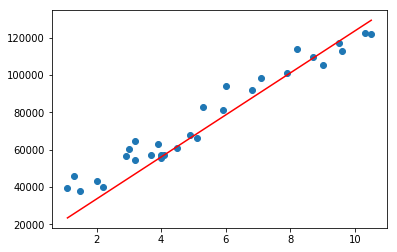

In [170]:
%matplotlib inline 
import matplotlib.pyplot as plt
x = np.array(points[:,0])
y = np.array(points[:,1])
plt.scatter(x,y)
pred = m*x + n 
plt.plot(x,pred, c='r')
plt.show()